# Impulse Response

In [2]:
%run ../setup.ipynb

The convolution operation is closely related to the idea of an **impulse response**.
In this section, we'll work through what this all means, and how convolution can be related to acoustic wave propagation.

## What is an impulse?
```{eval-rst}
.. index:: impulse
```
Before we go further, we'll need to define an **impulse**.
An impulse is an idealized signal consisting of a single 1, followed by (in theory at least) infinitely many zeros:

$$
x_\mid = [1, 0, 0, 0, \cdots].
$$

Impulses are theoretical constructs, and cannot exist in nature.
The closest familiar sounds to an impulse would be things like a balloon popping, or tapping two hard objects together, but these sounds will only approximate an ideal impulse.

We can construct impulses inside a computer (or with a pencil and paper), and doing so can help us understand the behavior of many signal processing operations.

(impulse-response)=
## Impulse response of a filter
```{eval-rst}
.. index:: ! impulse response
```
In general, a *filter* is any process that consumes one signal as input and produces a new signal as output.
One might express this notationally as

$$
\purple{y} = \red{g}(\blue{x})
$$

for input signal $x$ and filter operation $g$.

The **impulse response** of a filter $g$ is the signal $y$ produced by applying $g$ to an impulse:

$$
g\left(x_\mid\right).
$$

This is a broad and abstract definition, but in casual conversation, when people refer to filters they most often mean *linear filters*.
We'll go one step further in this section, and assume that the filtering operation is a convolution between the input $x$ and some fixed sequence $h$.
One may then ask *what is the impulse response of a convolutional filter*?

Here, we'll go back to the definition of convolution:

$$
\purple{y[n]} = \sum_{k=0}^{K-1} \red{h[k]} \cdot \blue{x[n-k]}.
$$

Plugging in our definition of an ideal impulse $x=x_\mid$, we see that $x[n-k] = 1$ if $n=k$ (so that $n-k=0$) and $x[n-k] = 0$ otherwise.
This means that we can simplify the calculation significantly:

```{math}
:label: impulse-response

\purple{y[n]} &= \sum_{k=0}^{K-1} \red{h[k]} \cdot \blue{x[n-k]}\\
&= \red{h[n]} \cdot x_\mid[0]\\
&= \red{h[n]}.
```

That is, the impulse response of a convolutional filter is the sequence $h$ itself.

Put another way, the impulse response alone is enough to completely characterize a convolutional filter: no other information is necessary.

## Finite impulse response (FIR)
```{eval-rst}
.. index:: impulse response; finite
```
You may have heard the term **finite impulse response (FIR)** and wondered what it meant.
In plain terms, an FIR filter is any filter whose impulse response goes to 0 and stays there after some finite number of samples.
In general, this critical number of samples is a property of the filter in question, and will vary from one filter to the next.

In the case of convolutional filters, $g(x) = h*x$ (for some finite sequence $h$ of length $K$), the impulse response must go to 0 after $K$ samples.
This is because any output sample after that point will depend only on the trailing zeros in the impulse.

In short, **convolutional filters have a finite impulse response.**

In later chapters, we'll see examples of other kinds of filters which use feedback to achieve an *infinite impulse response (IIR)*.
But for now, there's still much more to explore with convolutional filters.

## Room impulse response
```{eval-rst}
.. index:: impulse response; room
```
Beyond digital filters, you can also think about impulse responses of physical environments.
Imagine placing a sound source and a microphone in a room, and for now, let's assume that the room's walls have perfectly (acoustically) reflective surfaces.
Any sound emanating from the source will then have multiple paths to the microphone: the direct (shortest) path, as well as longer paths that reflect from each wall (or multiple walls).
If the sound source produces an ideal impulse, we can observe the impulse arriving at the microphone at different *delay* times (corresponding to the different paths of arrival).
Because each path has different length, the intensity of the sound will diminish for the longer paths corresponding to higher delay times.

This process is illustrated below, for an example where we have two perpendicular walls (and no floor or ceiling, just to keep things simple).

<Figure size 432x432 with 1 Axes>

<Figure size 432x432 with 1 Axes>

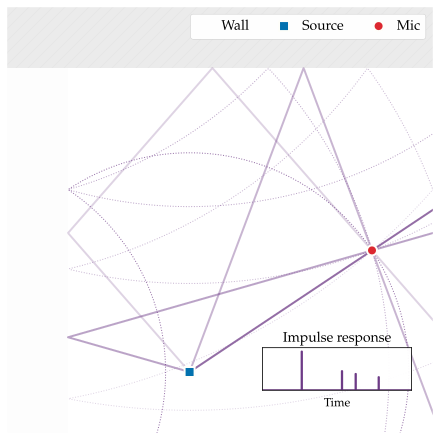

In [37]:
# Animate a ray tracing demo
#
# - point source, microphone, one reflective wall
# - show impulse response being measured continuously in one pane as rays trace out and decay
import matplotlib.patches as mp

fig, ax = plt.subplots(figsize=(6, 6))

# Put a sound source at the origin
x_src = np.asarray([[0, 0]])
# a microphone at (+2, +2)
x_mic = np.asarray([[3, 2]])

# horizontal wall at (y=+5)
y_wall = 5
wall_top = patches.Rectangle((-3, y_wall), 8, 8, fill=True,
                                   facecolor=colors[3], hatch='//', alpha=0.1,
                                   label='Wall')
# vertical wall at (x=-2)
x_wall = -2
wall_left = patches.Rectangle((x_wall, -3), -8, 8, fill=True,
                                    facecolor=colors[3], hatch='//', alpha=0.1)

# Reflect the mic across the horizontal wall
x_mic_horiz = x_mic.copy()
x_mic_horiz[:, 1] = 2 * y_wall - x_mic[:, 1]

x_mic_vert = x_mic.copy()
x_mic_vert[:, 0] = 2 * x_wall - x_mic[:, 0]

x_src_horiz = x_src.copy()
x_src_horiz[:, 1] = 2 * y_wall - x_src[:, 1]

x_src_vert = x_src.copy()
x_src_vert[:, 0] = 2 * x_wall - x_src[:, 0]

ax.add_artist(wall_top)
ax.add_artist(wall_left)
ax.scatter(x_src[:, 0], x_src[:, 1], zorder=10, label='Source', marker='s', s=100, edgecolor='#fefefa', linewidth=2)
ax.scatter(x_mic[:, 0], x_mic[:, 1], zorder=10, label='Mic', s=100, edgecolor='#fefefa', linewidth=2)
handles, _ = ax.get_legend_handles_labels()
#handles.append(wall_top)
ax.legend(handles=handles, loc='upper right', ncol=3)

# Distances
d0 = np.sqrt(np.sum(x_mic**2))
d1 = np.sqrt(x_mic[0, 0]**2 + (2 * y_wall - x_mic[0, 1])**2)
d2 = np.sqrt(x_mic[0, 1]**2 + (2 * x_wall - x_mic[0, 0])**2)
d3 = np.sqrt((2 * y_wall - x_mic[0, 1])**2 + (2 * x_wall - x_mic[0, 0])**2)

N = 512
v_sound = 1
d_max = max(d0, d1, d2, d3) + 3 # in meters ... go a bit further than the last ray intersection
radii = np.linspace(0, d_max, num=N, endpoint=True)
times = radii / v_sound   # [meters / meters/sec] => [sec]

t0 = np.argmin((d0 - times)**2)
t1 = np.argmin((d1 - times)**2)
t2 = np.argmin((d2 - times)**2)
t3 = np.argmin((d3 - times)**2)


# Direct path
angle_0 = np.arctan2(x_mic[0, 1], x_mic[0, 0])
ray_0 = times * np.vstack([np.cos(angle_0), np.sin(angle_0)])

# First-order reflections
angle_1 = np.arctan2(x_mic_horiz[0, 1], x_mic_horiz[0, 0])
ray_1 = times * np.vstack([np.cos(angle_1), np.sin(angle_1)])
ray_1[1] = np.minimum(ray_1[1], 2 * y_wall - ray_1[1])

angle_2 = np.arctan2(x_mic_vert[0, 1], x_mic_vert[0, 0])
ray_2 = times * np.vstack([np.cos(angle_2), np.sin(angle_2)])
ray_2[0] = np.maximum(ray_2[0], 2 * x_wall - ray_2[0])

# Second order reflection
angle_3 = np.arctan2(x_mic_horiz[0, 1], x_mic_vert[0, 0])
ray_3 = times * np.vstack([np.cos(angle_3), np.sin(angle_3)])
ray_3[0] = np.maximum(ray_3[0], 2 * x_wall - ray_3[0])
ray_3[1] = np.minimum(ray_3[1], 2 * y_wall - ray_3[1])

M = 32
p0 = ax.plot(ray_0[0, :M], ray_0[1, :M], color=colors[4], linewidth=2)[0]
p1 = ax.plot(ray_1[0, :M], ray_1[1, :M], color=colors[4], linewidth=2)[0]
p2 = ax.plot(ray_2[0, :M], ray_2[1, :M], color=colors[4], linewidth=2)[0]
p3 = ax.plot(ray_3[0, :M], ray_3[1, :M], color=colors[4], linewidth=2)[0]

angles = np.linspace(0, 2 * np.pi, num=1025, endpoint=True)


ax.set_xlim([-3, 4])
ax.set_ylim([-1, 6]);
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.axis('off');

ax2 = ax.inset_axes([0.6, 0.1, 0.35, 0.1])
ax2.set_facecolor((1, 1, 1, 0.95))
h = np.zeros_like(times)
h[t0] = 1/radii[t0]
h[t1] = 1/radii[t1]
h[t2] = 1/radii[t2]
h[t3] = 1/radii[t3]

ph = ax2.step(times, h, color=colors[4])[0]
ax2.set_xlim([times.min(), times.max()])
ax2.set_ylim([0, h.max()* 1.1])
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_title('Impulse response')
ax2.set_xlabel('Time')
for spine in ax2.spines:
    ax2.spines[spine].set_visible(True)
    
p0.set_data(ray_0[0], ray_0[1])
p0.set_alpha(1 - d0 / radii[-1])
p1.set_data(ray_1[0], ray_1[1])
p1.set_alpha(1 - d1 / radii[-1])
p2.set_data(ray_2[0], ray_2[1])
p2.set_alpha(1 - d2 / radii[-1])
p3.set_data(ray_3[0], ray_3[1])
p3.set_alpha(1 - d3 / radii[-1])
ph.set_data(times, h)

#p0.set_visible(False)
#p1.set_visible(False)
#p2.set_visible(False)
#p3.set_visible(False)

for d in [d0, d1, d2, d3]:
    s_x = d * np.cos(angles)
    s_y = d * np.sin(angles)
    np.maximum(s_x, 2 * x_wall - s_x, out=s_x)
    np.minimum(s_y, 2 * y_wall - s_y, out=s_y)
    ax.plot(s_x, s_y, color=colors[4], linewidth=1, linestyle=':', alpha=1-d/radii[-1])

glue('rir', fig, display=False)

```{glue:figure} rir

A sound radiating from a source (square) emanating in all directions reflects off surfaces, resulting in multiple paths (straight lines) to a recording device.
Dashed circles indicate the wavefronts at different times, and darker lines indicate higher intensity.
```

This entire physical process can be thought of as implementing a convolution.
Each reflection path corresponds to a different delay $k$, and the decrease in recorded intensity corresponds to the gain coefficient $h[k]$ for that path.

Note that the impulse response depends not only of the physical environment, but also the positioning of the sound source and microphone: if you move either (or both) of these, the impulse response will generally change.

The example above is significantly simplified from physical reality in several ways.
First, a real room would have three dimensions (floors and ceilings) which can also provide reflective surfaces and increase the number of paths.
Second, the surface materials play a large part in how sound is reflected or diffused when colliding with a wall, so the observed delayed signal would not generally be a perfectly scaled copy of the impulse.
Third, as mentioned at the beginning of this section, it's not physically possible to produce an *ideal* impulse, so what you would actually record at the microphone is the convolution of the room's impulse response with whatever sound was actually produced by the source.
(In practice, non-ideal impulses can also be used, as can other signals such as sinusoidal sweeps, but that's a bit beyond the scope of this section.)

Despite the limitations of this example, it can still be instructive to think about convolution as a physical process, as it provides mechanisms which implement delay, gain, and mixing in a natural context.

### *What can I do with this?*

Say you were able to perform the above experiment in an environment of your choice, resulting in an impulse response recording $h$.
Remember how earlier in this section, we saw that the impulse response of a convolution $h*x$ is just $h$?
This means that if we have $h$, we can now apply it to **any signal** $x$ (not just an impulse), and simulate the effect of hearing it in the environment characterized by $h$.

The following code example demonstrates this process for a pre-recorded impulse response and input signal.

In [11]:
import numpy as np
from IPython.display import display, Audio

# We'll need soundfile to load waves
import soundfile

# Input signal is a short piano excerpt
# https://freesound.org/people/Piotr123/sounds/511749/
x, fs = soundfile.read('511749__piotr123__jazz-piano-intro-mono.wav')

# Impulse response is from a church: 
# https://freesound.org/s/474296/
h, fs2 = soundfile.read('474296__petherjwag__ir-church-01-mono.wav')

# Check that the sampling rates match
assert fs == fs2

# Convolve the signal with the impulse response
y = np.convolve(x, h)

display('Impulse response')
display(Audio(data=h, rate=fs))
display('Input signal')
display(Audio(data=x, rate=fs))
display('Output signal')
display(Audio(data=y, rate=fs))

'Impulse response'

'Input signal'

'Output signal'

I encourage you to try this out for yourself.
If you don't have the materials necessary to record your own impulse responses, there are plenty of examples available on [Freesound.org](https://freesound.org/search/?q=impulse+response).